# Self-Balancing Scooter Control

![](images/self-balancing-scooter.png)

> A self-balancing scooter [...] is a self-balancing personal transporter consisting of two motorized wheels connected to a pair of articulated pads on which the rider places their feet. The rider controls the speed by leaning forward or backward, and direction of travel by twisting the pads.
>
> Source: <https://en.wikipedia.org/wiki/Self-balancing_scooter>

### Python Dependencies

In [ ]:
from numpy import *
from numpy.linalg import *

from scipy.linalg import *
from scipy.integrate import *
from scipy.signal import *

from matplotlib.pyplot import *

Step 1 - Scooter Planar Model
================================

### Introduction

We consider a simple model of a self-balancing scooter evolving in the plane. It is mainly made of

  - The frame that contains the two articulated pads; from above, each pad essentially look like a triangle (one vertice in the center of the frame, one vertice at each extremity of the wheel).

  - Two fixed wheels (their orientation with respect to the frame does not change).
    They are parallel and located at opposite ends of the frame.
    
Let $(0, e_x, e_y)$ be a direct orthonormal frame of the plane. We denote

  - $(x, y)$ the coordinates of the wheel axis center in the orthonormal and
  - $\theta$ the angle of the wheels direction with respect to vector $e_x$ ; with $\theta = 0$ when the front of the scooter faces the right ($e_x$) and $\theta = \pi/2$ when it faces upwards ($e_y$).

  - $\phi_l$ and $\phi_r$ the rotation angles of the left and right wheel respectively ; by convention, when these angles increase, the scooter moves forward.

### Parameter Definition

From now on, we assume that the seat frame length is $\ell = 50 \mbox{ cm}$ and the wheel radius is $r = 12.5 \mbox{ cm}$.

🧩 Define the corresponding Python variables `l` and `r` (express every length in meters, and more generally in the sequel, always use the [international standard of units](https://en.wikipedia.org/wiki/SI_derived_unit)) for numerical values.

In [ ]:
l = 50 * 10**(-2) # in meters
r = 12.5 * 10**(-2) #in meters
pass

### Graphical Representation

🧩 Implement a function `draw_scooter` with arguments `x`, `y` and `theta` that draws a simple geometric model of the wheelchair (with a red frame and black fixed wheels) in the plane (top view) for arbitrary values of $(x, y)$ and $\theta$. Use a green circle marker 50 cm in of the frame to indicate which way is forward.

🗝️ **Hint.** Use the function `plot` of `matplotlib.pyplot`.

<ipython-input-31-cced79ccc0f0>:48: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(-1, -1)  # Unités sur l'axe x


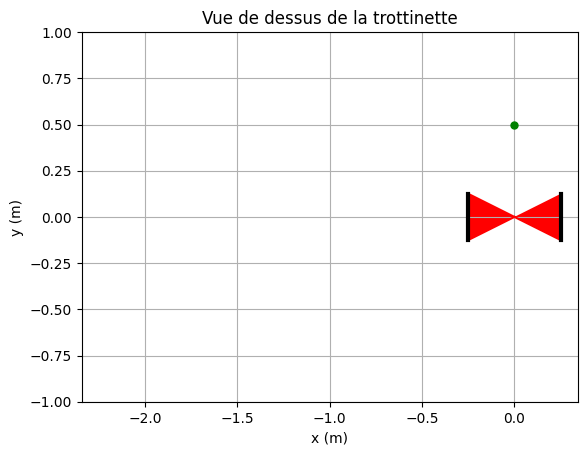

In [ ]:
import matplotlib.pyplot as plt

def draw_scooter(x, y, theta):
    # Définition des dimensions
    l = 50/100    # Longueur du cadre du siège en centimètres
    r = 12.5/100  # Rayon de la roue en centimètres

    # Calcul des coordonnées des points du cadre
    cadre_points = np.array([[x, y],
                             [x - l/2, y + r],
                             [x - l/2, y - r],
                             [x + l/2, y + r],
                             [x + l/2, y - r]])

    # Transformation des coordonnées en fonction de l'angle theta
    rotation_matrix = np.array([[np.sin(theta), np.cos(theta)],
                                [np.cos(theta), -np.sin(theta)]])
    rotated_cadre_points = np.dot(cadre_points - [x, y], rotation_matrix) + [x, y]

    # Dessin du cadre
    plt.plot(rotated_cadre_points[:,0], rotated_cadre_points[:,1], 'r-')

    # Dessin et remplissage des triangles représentant les patins
    plt.fill([rotated_cadre_points[0,0], rotated_cadre_points[1,0], rotated_cadre_points[2,0], rotated_cadre_points[0,0]],
             [rotated_cadre_points[0,1], rotated_cadre_points[1,1], rotated_cadre_points[2,1], rotated_cadre_points[0,1]], 'r')
    plt.fill([rotated_cadre_points[0,0], rotated_cadre_points[3,0], rotated_cadre_points[4,0], rotated_cadre_points[0,0]],
             [rotated_cadre_points[0,1], rotated_cadre_points[3,1], rotated_cadre_points[4,1], rotated_cadre_points[0,1]], 'r')

    # Dessin des roues aux extrémités des patins avec une épaisseur de ligne plus importante
    plt.plot([rotated_cadre_points[1,0], rotated_cadre_points[2,0]], [rotated_cadre_points[1,1], rotated_cadre_points[2,1]], 'k-', linewidth=3)
    plt.plot([rotated_cadre_points[3,0], rotated_cadre_points[4,0]], [rotated_cadre_points[3,1], rotated_cadre_points[4,1]], 'k-', linewidth=3)

    # Calcul des coordonnées du marqueur vert indiquant la direction avant
    forward_marker_x = x + 50/100 * np.cos(theta)
    forward_marker_y = y + 50/100 * np.sin(theta)

    # Dessin du marqueur vert
    plt.plot(forward_marker_x, forward_marker_y, 'go', markersize=5)

    # Configuration des axes
    plt.axis('equal')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('Vue de dessus de la trottinette')

    # Affichage
    plt.grid(True)
    plt.xlim(-1, -1)  # Unités sur l'axe x
    plt.ylim(-1, 1) # Unités sur l'axe y

# Exemple d'utilisation
draw_scooter(0, 0, pi/2)


🧩 Represent the wheelchair when $(x, y, \theta) = (0, 0, 0), (2, 2, \pi/2), (0, 4, \pi), (-2, 2, 3\pi/2)$.

🗝️ **Hint.** Use the following `draw_arena` function beforehand.

In [ ]:
def draw_arena(xmin, xmax, ymin, ymax):
    wh_ratio = (xmax - xmin) / (ymax - ymin)
    figsize = fig_width, fig_height = 16, 16 / wh_ratio
    figure(figsize=figsize)
    axes = gca()
    axes.axis([xmin, xmax, ymin, ymax])
    axes.set_aspect(1)
    xticks(arange(xmin, xmax+1, 1))
    yticks(arange(ymin, ymax+1, 1))
    grid(True)

<ipython-input-31-cced79ccc0f0>:48: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(-1, -1)  # Unités sur l'axe x


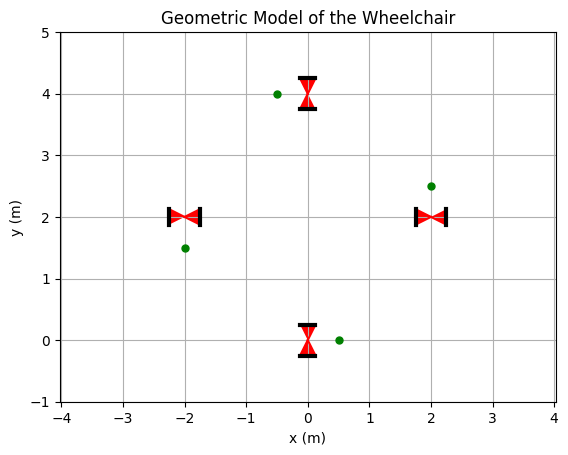

In [ ]:
positions = [(0, 0, 0), (2, 2, np.pi/2), (0, 4, np.pi), (-2, 2, 3*np.pi/2)]
# Calculer les limites des axes pour centrer les trottinettes
x_min = min(pos[0] for pos in positions)
x_max = max(pos[0] for pos in positions)
y_min = min(pos[1] for pos in positions)
y_max = max(pos[1] for pos in positions)

# Dessiner les trottinettes centrées
for pos in positions:
    draw_scooter(*pos)

# Ajuster les limites des axes pour centrer les trottinettes
plt.xlim(x_min - 1, x_max + 1)
plt.ylim(y_min - 1, y_max + 1)

# Configuration des axes
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Geometric Model of the Wheelchair')
plt.grid(True)

# Afficher le graphique
plt.show()


### Kinematic Modeling

We assume that we can control the wheels angular velocities $\omega_l = \dot{\phi}_l$ and $\omega_r = \dot{\phi}_r$ (this is a *kinematic* model of the wheelchair).
We also assume that the wheelchair fixed wheels roll without slipping.

🧩 Establish the differential equations that relate $\dot{x}$,
$\dot{y}$ and $\dot{\theta}$ with $\omega_l$ and $\omega_r$.

In [ ]:
import numpy as np

def differential_drive_kinematics(omega_l, omega_r, theta, r, L):
    # Calculate linear and angular velocities of the wheels
    v_l = r * omega_l
    v_r = r * omega_r

    # Calculate average linear velocity of the robot
    v = (v_r + v_l) / 2.0

    # Calculate angular velocity of the robot
    omega = (v_r - v_l) / L

    # Calculate rates of change of x, y, and theta
    x_dot = v * np.cos(theta)
    y_dot = v * np.sin(theta)
    theta_dot = (r / L) * (omega_r - omega_l)

    return x_dot, y_dot, theta_dot
pass

**TODO**

### Analysis

🧩 Show that if $\omega_l$ and $\omega_r$ are continuously differentiable functions of $(x, y, \theta)$ (which includes the case of constant inputs), this system is well-posed.

In [ ]:
def differential_drive_kinematics(state, omega_l, omega_r, r, L):
    x, y, theta = state

    # Calculate linear and angular velocities of the wheels
    v_l = r * omega_l(x, y, theta)
    v_r = r * omega_r(x, y, theta)

    # Calculate average linear velocity of the robot
    v = (v_r + v_l) / 2.0

    # Calculate angular velocity of the robot
    omega = (v_r - v_l) / L

    # Calculate rates of change of x, y, and theta
    x_dot = v * np.cos(theta)
    y_dot = v * np.sin(theta)
    theta_dot = omega

    return x_dot, y_dot, theta_dot

# Define the functions for omega_l and omega_r
def omega_l(x, y, theta):
    return 2 * np.sin(theta)

def omega_r(x, y, theta):
    return 3 * np.cos(theta)

# Define the initial condition
initial_state = [0, 0, np.pi/4]  # [x0, y0, theta0]

# Define other parameters
r = 0.1  # Radius of the wheel (meters)
L = 0.5  # Distance between the wheels (meters)

# Calculate the rates of change of x, y, and theta
x_dot, y_dot, theta_dot = differential_drive_kinematics(initial_state, omega_l, omega_r, r, L)

# Print the rates of change
print("Rates of change:")
print("x_dot:", x_dot)
print("y_dot:", y_dot)
print("theta_dot:", theta_dot)


Rates of change:
x_dot: 0.12500000000000003
y_dot: 0.125
theta_dot: 0.14142135623730956


**TODO**

🧩 Show that if $\omega_l$ and $\omega_r$ are constants, the maximal solution associated to any initial state is global. Is is still true of $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x, y, \theta)$ ?

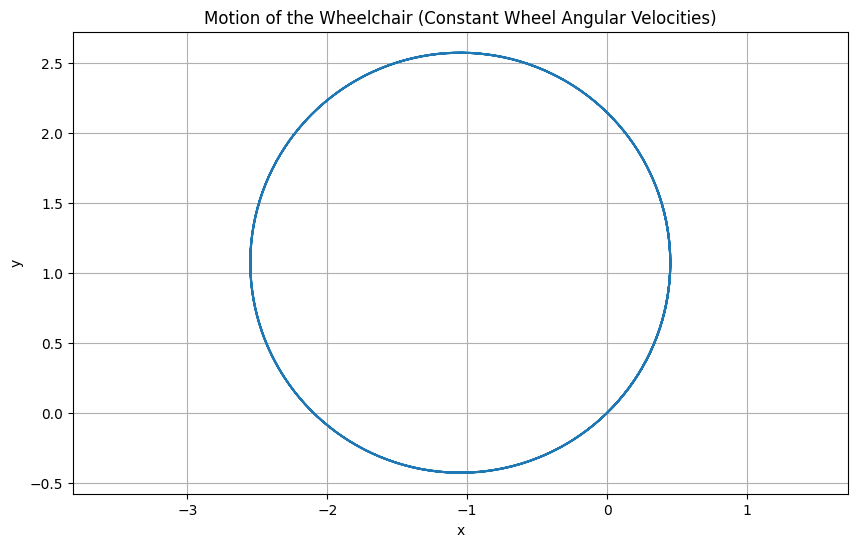

In [14]:
omega_l = 1  # Constant left wheel angular velocity
omega_r = 5  # Constant right wheel angular velocity

#These equations are separable and can be integrated directly. Since omega_l and omega_r are constants, the solution will be defined for all t
#and will not diverge, thus demonstrating that the maximal solution is global.
# Initial state
x0, y0, theta0 = 0, 0, np.pi/4  # Initial position (x, y) and orientation theta

# Time
dt = 0.01
t_max = 10
t_values = np.arange(0, t_max, dt)

# Function to compute derivatives
def compute_derivatives(x, y, theta):
    x_dot = r / 2 * (omega_r + omega_l) * np.cos(theta)
    y_dot = r / 2 * (omega_r + omega_l) * np.sin(theta)
    theta_dot = r / (2 * L) * (omega_r - omega_l)
    return x_dot, y_dot, theta_dot

# Simulation
x_values = [x0]
y_values = [y0]
theta_values = [theta0]
for t in t_values[:-1]:
    x_dot, y_dot, theta_dot = compute_derivatives(x_values[-1], y_values[-1], theta_values[-1])
    x_values.append(x_values[-1] + x_dot * dt)
    y_values.append(y_values[-1] + y_dot * dt)
    theta_values.append(theta_values[-1] + theta_dot * dt)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Motion of the Wheelchair (Constant Wheel Angular Velocities)')
plt.grid(True)
plt.axis('equal')
plt.show()

**TODO**

### Vector Field

In the sequel, `omega` is a function that computes the input vector $\omega := (\omega_l, \omega_r)$ given the time $t$ and $(x, y, \theta)$ (thus, it may depend on the time and/or on the system state if needed). For example:

In [ ]:
def omega(t, xytheta):
    omega_l = (1 - l/4) * pi / r
    omega_r = (1 + l/4) * pi / r
    return array([omega_l, omega_r])

🧩 Implement a function `fun(t, xytheta)` that computes $(\dot{x}, \dot{y}, \dot{\theta})$ given the time $t$ and $(x,y,\theta)$ (and implicitly the inputs $\omega$ computed by the function `omega`).

In [ ]:
pass

### Simulation Setup

🧩 Simulate the wheelchair dynamics for 4 seconds when $(x_0, y_0, \theta_0)(t=0) = (0.0, 0.0, 0.0)$,
and the wheels velocities are the constants $\omega_l = (1 - \ell/4)  \pi / r \mbox{ rad/s}$ and $\omega_r = (1 + \ell/4)  \pi / r \mbox{ rad/s}$.
(Compute the dense outputs.)
   

In [ ]:
pass

🧩 Use the simulation results to draw the graphs of $x(t)$, $y(t)$ and $\theta(t)$.

In [ ]:
pass

🧩 Use the simulation results to display the robot location every 0.5 second.

In [ ]:
pass

🧩 What should be the analytical expression of $x(t)$, $y(t)$ and $\theta(t)$?

**TODO**

🧩 Do you experimental results match the theoretical results ? Draw the curves of the simulation error at time $t$ for $x$, $y$ and $\theta$.

In [ ]:
pass

🧩 If needed, adjust the simulation parameters the simulated position error is less than $1\, \mathrm{ mm}$.

In [ ]:
pass